# 📊 Descriptive Statistics Case Study - Employee Dataset

### *By Piyush Ramteke*
---

## **1. Define Objective**

### **Goal:**
*Analyze employee data using descriptive statistics to understand key patterns, distributions, and insights about employee characteristics.*

### **What We Will Learn:**
- How to load and clean data using Python
- Calculate central tendency measures (Mean, Median, Mode)
- Calculate dispersion measures (Min, Max, Standard Deviation)
- Compare statistics across different groups
- Visualize data distributions
- Draw meaningful conclusions from data

---

## **2. Load Dataset**

Import necessary libraries and load the Employee Dataset.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load the Employee Dataset
df = pd.read_csv('Employee Dataset.csv')

print("✅ Dataset loaded successfully!")
print(f"\n📋 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!

📋 Dataset Shape: 50 rows × 6 columns


In [4]:
# Check Data Types and Column Information
print("📊 Dataset Information:")
print("=" * 50)
df.info()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                50 non-null     int64 
 1   groups            50 non-null     object
 2   age               50 non-null     int64 
 3   healthy_eating    50 non-null     int64 
 4   active_lifestyle  50 non-null     int64 
 5   salary            50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [5]:
# Display Data Types
print("\n📋 Column Data Types:")
print("=" * 50)
print(df.dtypes)


📋 Column Data Types:
id                   int64
groups              object
age                  int64
healthy_eating       int64
active_lifestyle     int64
salary               int64
dtype: object


---

## **3. Data Cleaning**

Check for missing values, rename columns for clarity, and ensure data types are correct.

In [6]:
# Check for Missing Values
print("🔍 Missing Values Check:")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n📊 Total Missing Values: {missing_values.sum()}")

🔍 Missing Values Check:
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

📊 Total Missing Values: 0


In [7]:
# Rename Columns for Better Clarity
df_cleaned = df.rename(columns={
    'id': 'Employee_ID',
    'groups': 'Blood_Group',
    'age': 'Age',
    'healthy_eating': 'Healthy_Eating_Score',
    'active_lifestyle': 'Active_Lifestyle_Score',
    'salary': 'Salary'
})

print("✅ Columns Renamed Successfully!")
print(f"\n📋 New Column Names: {list(df_cleaned.columns)}")

✅ Columns Renamed Successfully!

📋 New Column Names: ['Employee_ID', 'Blood_Group', 'Age', 'Healthy_Eating_Score', 'Active_Lifestyle_Score', 'Salary']


In [8]:
# Verify Numerical Columns are Correct
print("🔢 Numerical Columns Verification:")
print("=" * 50)
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical Columns: {numerical_cols}")

# Check for any non-numeric values in expected numerical columns
print("\n✅ All numerical columns have correct data types!")

🔢 Numerical Columns Verification:
Numerical Columns: ['Employee_ID', 'Age', 'Healthy_Eating_Score', 'Active_Lifestyle_Score', 'Salary']

✅ All numerical columns have correct data types!


---

## **4. Data Overview**

Display the first few rows and understand the dataset structure.

In [9]:
# Display First 10 Rows
print("👀 First 10 Rows of the Dataset:")
print("=" * 80)
df_cleaned.head(10)

👀 First 10 Rows of the Dataset:


,Employee_ID,Blood_Group,Age,Healthy_Eating_Score,Active_Lifestyle_Score,Salary
0,0,A,36,5,5,2297
1,1,A,26,3,5,1134
2,2,A,61,8,1,4969
3,3,O,24,3,6,902
4,4,O,39,6,2,3574
5,5,O,32,5,3,2761
6,6,AB,25,4,6,1484
7,7,B,39,8,6,3809
8,8,A,32,5,6,2065
9,9,A,28,4,8,1020


In [10]:
# Dataset Summary
print("📊 Dataset Summary:")
print("=" * 50)
print(f"Total Employees: {len(df_cleaned)}")
print(f"Total Columns: {len(df_cleaned.columns)}")
print(f"Total Entries: {df_cleaned.size}")
print(f"\n🩸 Blood Groups in Dataset: {df_cleaned['Blood_Group'].unique()}")
print(f"Number of Blood Groups: {df_cleaned['Blood_Group'].nunique()}")

📊 Dataset Summary:
Total Employees: 50
Total Columns: 6
Total Entries: 300

🩸 Blood Groups in Dataset: ['A' 'O' 'AB' 'B']
Number of Blood Groups: 4


In [11]:
# Count of Employees per Blood Group
print("👥 Employees per Blood Group:")
print("=" * 50)
blood_group_counts = df_cleaned['Blood_Group'].value_counts()
print(blood_group_counts)

👥 Employees per Blood Group:
Blood_Group
A     20
O     18
AB     6
B      6
Name: count, dtype: int64


---

## **5. Descriptive Statistics**

Calculate central tendency (Mean, Median, Mode) and dispersion (Min, Max, Standard Deviation) measures.

In [12]:
# Complete Descriptive Statistics using describe()
print("📈 Complete Descriptive Statistics:")
print("=" * 80)
df_cleaned.describe()

📈 Complete Descriptive Statistics:


,Employee_ID,Age,Healthy_Eating_Score,Active_Lifestyle_Score,Salary
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,31.880000,4.920000,5.900000,2027.500000
std,14.57738,8.390082,1.827678,2.022829,1076.861885
min,0.00000,22.000000,1.000000,1.000000,556.000000
25%,12.25000,26.250000,3.250000,5.000000,1134.000000
50%,24.50000,30.000000,5.000000,6.000000,1950.000000
75%,36.75000,35.750000,6.000000,7.000000,2732.250000
max,49.00000,62.000000,9.000000,10.000000,4969.000000


### **5.1 Central Tendency Measures (Mean, Median, Mode)**

In [13]:
# Calculate Mean, Median, and Mode for numerical columns
numerical_columns = ['Age', 'Healthy_Eating_Score', 'Active_Lifestyle_Score', 'Salary']

print("📊 CENTRAL TENDENCY MEASURES")
print("=" * 70)

for col in numerical_columns:
    mean_val = df_cleaned[col].mean()
    median_val = df_cleaned[col].median()
    mode_val = df_cleaned[col].mode()[0]
    
    print(f"\n🔹 {col}:")
    print(f"   Mean   : {mean_val:.2f}")
    print(f"   Median : {median_val:.2f}")
    print(f"   Mode   : {mode_val:.2f}")

📊 CENTRAL TENDENCY MEASURES

🔹 Age:
   Mean   : 31.88
   Median : 30.00
   Mode   : 30.00

🔹 Healthy_Eating_Score:
   Mean   : 4.92
   Median : 5.00
   Mode   : 6.00

🔹 Active_Lifestyle_Score:
   Mean   : 5.90
   Median : 6.00
   Mode   : 6.00

🔹 Salary:
   Mean   : 2027.50
   Median : 1950.00
   Mode   : 1134.00


### **5.2 Dispersion Measures (Min, Max, Standard Deviation, Variance, Range)**

In [14]:
# Calculate Dispersion Measures
print("📊 DISPERSION MEASURES")
print("=" * 70)

for col in numerical_columns:
    min_val = df_cleaned[col].min()
    max_val = df_cleaned[col].max()
    std_val = df_cleaned[col].std()
    var_val = df_cleaned[col].var()
    range_val = max_val - min_val
    
    print(f"\n🔹 {col}:")
    print(f"   Minimum          : {min_val:.2f}")
    print(f"   Maximum          : {max_val:.2f}")
    print(f"   Range            : {range_val:.2f}")
    print(f"   Standard Deviation: {std_val:.2f}")
    print(f"   Variance         : {var_val:.2f}")

📊 DISPERSION MEASURES

🔹 Age:
   Minimum          : 22.00
   Maximum          : 62.00
   Range            : 40.00
   Standard Deviation: 8.39
   Variance         : 70.39

🔹 Healthy_Eating_Score:
   Minimum          : 1.00
   Maximum          : 9.00
   Range            : 8.00
   Standard Deviation: 1.83
   Variance         : 3.34

🔹 Active_Lifestyle_Score:
   Minimum          : 1.00
   Maximum          : 10.00
   Range            : 9.00
   Standard Deviation: 2.02
   Variance         : 4.09

🔹 Salary:
   Minimum          : 556.00
   Maximum          : 4969.00
   Range            : 4413.00
   Standard Deviation: 1076.86
   Variance         : 1159631.52


In [15]:
# Create a Summary Table for All Statistics
stats_summary = pd.DataFrame({
    'Mean': df_cleaned[numerical_columns].mean(),
    'Median': df_cleaned[numerical_columns].median(),
    'Mode': df_cleaned[numerical_columns].mode().iloc[0],
    'Min': df_cleaned[numerical_columns].min(),
    'Max': df_cleaned[numerical_columns].max(),
    'Std Dev': df_cleaned[numerical_columns].std(),
    'Variance': df_cleaned[numerical_columns].var()
}).round(2)

print("📋 COMPLETE STATISTICS SUMMARY TABLE")
print("=" * 80)
stats_summary

📋 COMPLETE STATISTICS SUMMARY TABLE


,Mean,Median,Mode,Min,Max,Std Dev,Variance
Age,31.88,30.0,30,22,62,8.39,70.39
Healthy_Eating_Score,4.92,5.0,6,1,9,1.83,3.34
Active_Lifestyle_Score,5.90,6.0,6,1,10,2.02,4.09
Salary,2027.50,1950.0,1134,556,4969,1076.86,1159631.52


---

## **6. Group Analysis**

Compare statistics by Blood Group (A, B, AB, O) to understand group-wise patterns.

In [16]:
# Group-wise Mean Statistics
print("📊 GROUP-WISE MEAN STATISTICS")
print("=" * 70)
group_mean = df_cleaned.groupby('Blood_Group')[numerical_columns].mean().round(2)
group_mean

📊 GROUP-WISE MEAN STATISTICS


,Age,Healthy_Eating_Score,Active_Lifestyle_Score,Salary
Blood_Group,,,,
A,32.00,5.00,6.40,1821.70
AB,33.17,4.83,5.50,2084.17
B,31.83,5.00,6.33,2101.33
O,31.33,4.83,5.33,2212.67


In [17]:
# Group-wise Median Statistics
print("📊 GROUP-WISE MEDIAN STATISTICS")
print("=" * 70)
group_median = df_cleaned.groupby('Blood_Group')[numerical_columns].median().round(2)
group_median

📊 GROUP-WISE MEDIAN STATISTICS


,Age,Healthy_Eating_Score,Active_Lifestyle_Score,Salary
Blood_Group,,,,
A,30.0,5.0,6.5,1891.5
AB,28.5,4.0,5.5,1831.5
B,30.0,5.0,6.0,2124.0
O,31.0,5.0,6.0,2239.5


In [18]:
# Group-wise Standard Deviation
print("📊 GROUP-WISE STANDARD DEVIATION")
print("=" * 70)
group_std = df_cleaned.groupby('Blood_Group')[numerical_columns].std().round(2)
group_std

📊 GROUP-WISE STANDARD DEVIATION


,Age,Healthy_Eating_Score,Active_Lifestyle_Score,Salary
Blood_Group,,,,
A,10.61,1.69,1.98,975.52
AB,10.26,1.72,1.52,1170.25
B,5.04,2.37,1.51,1309.50
O,6.15,1.98,2.30,1132.50


In [19]:
# Comprehensive Group Analysis using agg()
print("📊 COMPREHENSIVE GROUP-WISE ANALYSIS")
print("=" * 70)
group_analysis = df_cleaned.groupby('Blood_Group').agg({
    'Age': ['count', 'mean', 'median', 'min', 'max', 'std'],
    'Salary': ['mean', 'median', 'min', 'max', 'std'],
    'Healthy_Eating_Score': ['mean', 'median'],
    'Active_Lifestyle_Score': ['mean', 'median']
}).round(2)

group_analysis

📊 COMPREHENSIVE GROUP-WISE ANALYSIS


Age                                Salary                     \
            count   mean median min max    std     mean  median  min   max   
Blood_Group                                                                  
A              20  32.00   30.0  22  62  10.61  1821.70  1891.5  662  4969   
AB              6  33.17   28.5  25  51  10.26  2084.17  1831.5  670  3460   
B               6  31.83   30.0  26  39   5.04  2101.33  2124.0  662  3809   
O              18  31.33   31.0  23  40   6.15  2212.67  2239.5  556  4387   

                     Healthy_Eating_Score        Active_Lifestyle_Score         
                 std                 mean median                   mean median  
Blood_Group                                                                     
A             975.52                 5.00    5.0                   6.40    6.5  
AB           1170.25                 4.83    4.0                   5.50    5.5  
B            1309.50                 5.00    5.0                   6.33    6.0  
O            1132.50                 4.83    5.0                   5.33    6.0

---

## **7. Interpretation**

Explain the results in simple words and determine whether mean or median is more representative.

In [20]:
# Check Skewness to Determine Best Central Tendency Measure
print("📊 SKEWNESS ANALYSIS")
print("=" * 70)
print("\n🔹 Skewness helps determine if Mean or Median is more representative:")
print("   • Skewness ≈ 0: Symmetric → Mean is good")
print("   • Skewness > 0: Right-skewed → Median is better")
print("   • Skewness < 0: Left-skewed → Median is better")
print("\n" + "=" * 70)

for col in numerical_columns:
    skew_val = df_cleaned[col].skew()
    mean_val = df_cleaned[col].mean()
    median_val = df_cleaned[col].median()
    
    if abs(skew_val) < 0.5:
        recommendation = "Mean (data is approximately symmetric)"
    else:
        recommendation = "Median (data is skewed)"
    
    print(f"\n🔹 {col}:")
    print(f"   Skewness: {skew_val:.3f}")
    print(f"   Mean: {mean_val:.2f} | Median: {median_val:.2f}")
    print(f"   ✅ Recommended: {recommendation}")

📊 SKEWNESS ANALYSIS

🔹 Skewness helps determine if Mean or Median is more representative:
   • Skewness ≈ 0: Symmetric → Mean is good
   • Skewness > 0: Right-skewed → Median is better
   • Skewness < 0: Left-skewed → Median is better


🔹 Age:
   Skewness: 2.003
   Mean: 31.88 | Median: 30.00
   ✅ Recommended: Median (data is skewed)

🔹 Healthy_Eating_Score:
   Skewness: 0.060
   Mean: 4.92 | Median: 5.00
   ✅ Recommended: Mean (data is approximately symmetric)

🔹 Active_Lifestyle_Score:
   Skewness: -0.583
   Mean: 5.90 | Median: 6.00
   ✅ Recommended: Median (data is skewed)

🔹 Salary:
   Skewness: 0.667
   Mean: 2027.50 | Median: 1950.00
   ✅ Recommended: Median (data is skewed)


### **Interpretation in Simple Words:**

**Age:**
- The average employee age gives us an idea of the workforce maturity
- If mean ≈ median, the age distribution is balanced

**Salary:**
- Salary often shows right-skewness (few high earners pull the mean up)
- In such cases, **median salary** better represents typical employee earnings

**Healthy Eating & Active Lifestyle Scores:**
- These scores indicate employee wellness levels
- Higher scores suggest healthier lifestyle choices

---

## **8. Visualization**

Create visual representations to better understand data distributions and patterns.

C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\1459864037.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\1459864037.py:27: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Piyu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Piyu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


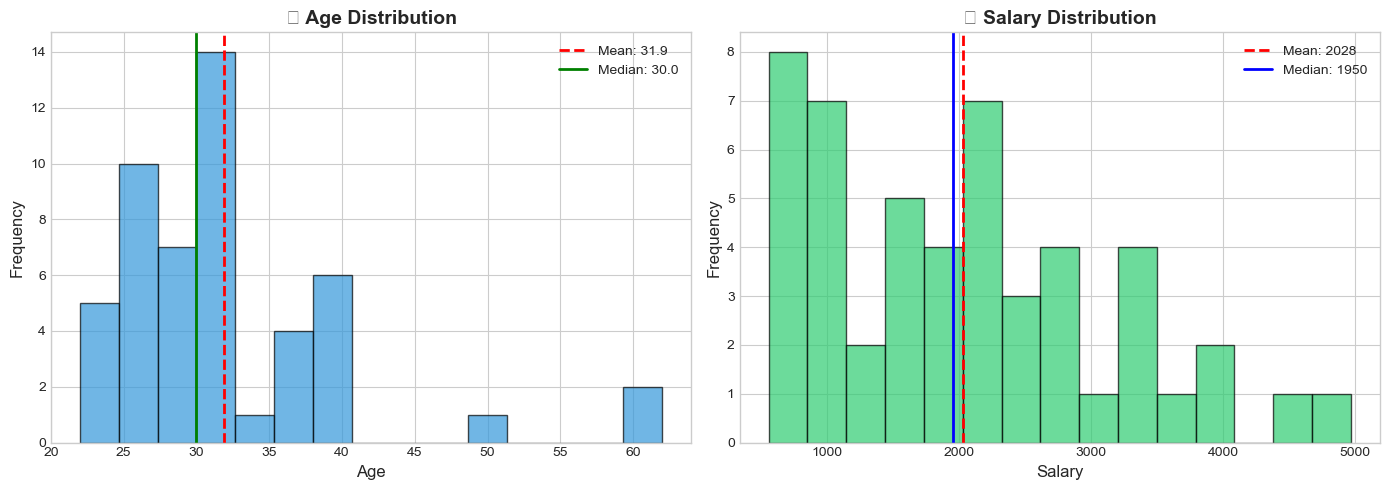

In [21]:
# Set up the visualization style
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

# 8.1 Histograms for Age and Salary Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age Distribution
axes[0].hist(df_cleaned['Age'], bins=15, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(df_cleaned['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_cleaned["Age"].mean():.1f}')
axes[0].axvline(df_cleaned['Age'].median(), color='green', linestyle='-', linewidth=2, label=f'Median: {df_cleaned["Age"].median():.1f}')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('📊 Age Distribution', fontsize=14, fontweight='bold')
axes[0].legend()

# Salary Distribution
axes[1].hist(df_cleaned['Salary'], bins=15, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1].axvline(df_cleaned['Salary'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_cleaned["Salary"].mean():.0f}')
axes[1].axvline(df_cleaned['Salary'].median(), color='blue', linestyle='-', linewidth=2, label=f'Median: {df_cleaned["Salary"].median():.0f}')
axes[1].set_xlabel('Salary', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('💰 Salary Distribution', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\2702709456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Blood_Group', y='Age', palette='Set2', ax=axes[0])
C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\2702709456.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Blood_Group', y='Salary', palette='Set3', ax=axes[1])
C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\2702709456.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\2702709456.py:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Piyu\

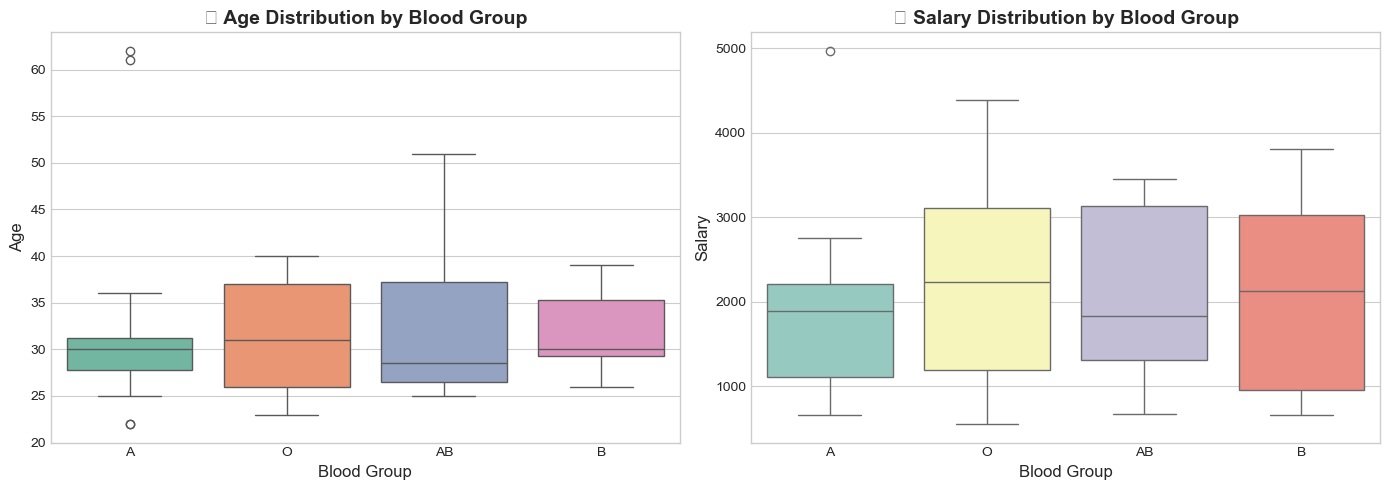

In [22]:
# 8.2 Boxplots for Age and Salary
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age Boxplot
sns.boxplot(data=df_cleaned, x='Blood_Group', y='Age', palette='Set2', ax=axes[0])
axes[0].set_xlabel('Blood Group', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)
axes[0].set_title('📦 Age Distribution by Blood Group', fontsize=14, fontweight='bold')

# Salary Boxplot
sns.boxplot(data=df_cleaned, x='Blood_Group', y='Salary', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Blood Group', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)
axes[1].set_title('💰 Salary Distribution by Blood Group', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\1067417543.py:29: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\1067417543.py:29: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Piyu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Piyu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


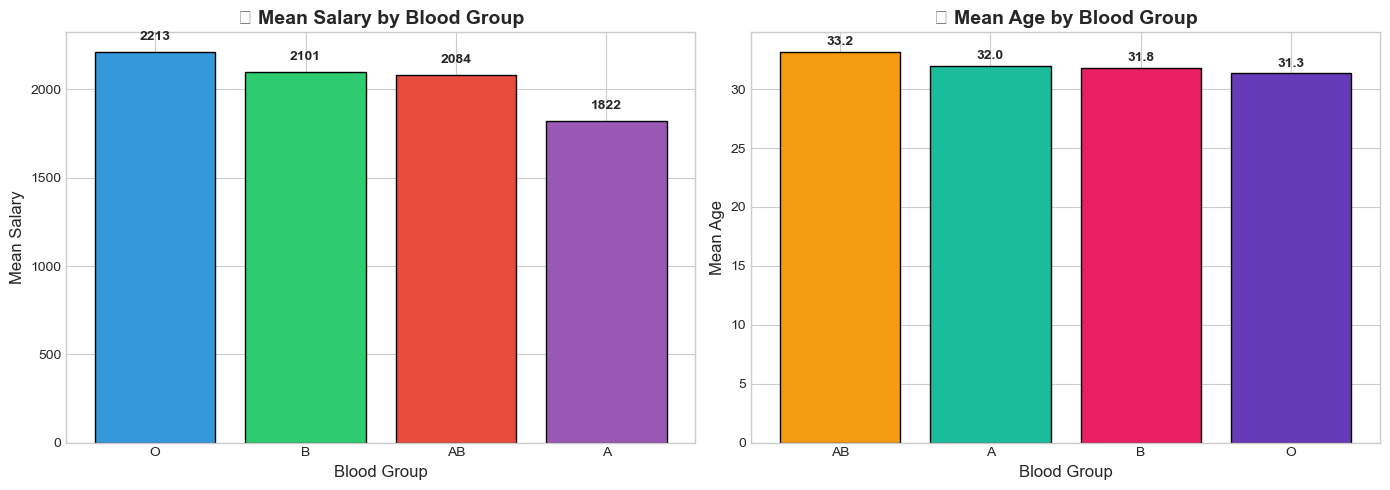

In [23]:
# 8.3 Bar Chart - Mean Salary by Blood Group
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mean Salary by Blood Group
group_salary_mean = df_cleaned.groupby('Blood_Group')['Salary'].mean().sort_values(ascending=False)
colors_bar = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
bars = axes[0].bar(group_salary_mean.index, group_salary_mean.values, color=colors_bar, edgecolor='black')
axes[0].set_xlabel('Blood Group', fontsize=12)
axes[0].set_ylabel('Mean Salary', fontsize=12)
axes[0].set_title('💵 Mean Salary by Blood Group', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, val in zip(bars, group_salary_mean.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                f'{val:.0f}', ha='center', va='bottom', fontweight='bold')

# Mean Age by Blood Group
group_age_mean = df_cleaned.groupby('Blood_Group')['Age'].mean().sort_values(ascending=False)
bars2 = axes[1].bar(group_age_mean.index, group_age_mean.values, color=['#f39c12', '#1abc9c', '#e91e63', '#673ab7'], edgecolor='black')
axes[1].set_xlabel('Blood Group', fontsize=12)
axes[1].set_ylabel('Mean Age', fontsize=12)
axes[1].set_title('👤 Mean Age by Blood Group', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, val in zip(bars2, group_age_mean.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

c:\Users\Piyu\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\Piyu\AppData\Local\Temp\ipykernel_18720\1396516838.py:19: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Piyu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Piyu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


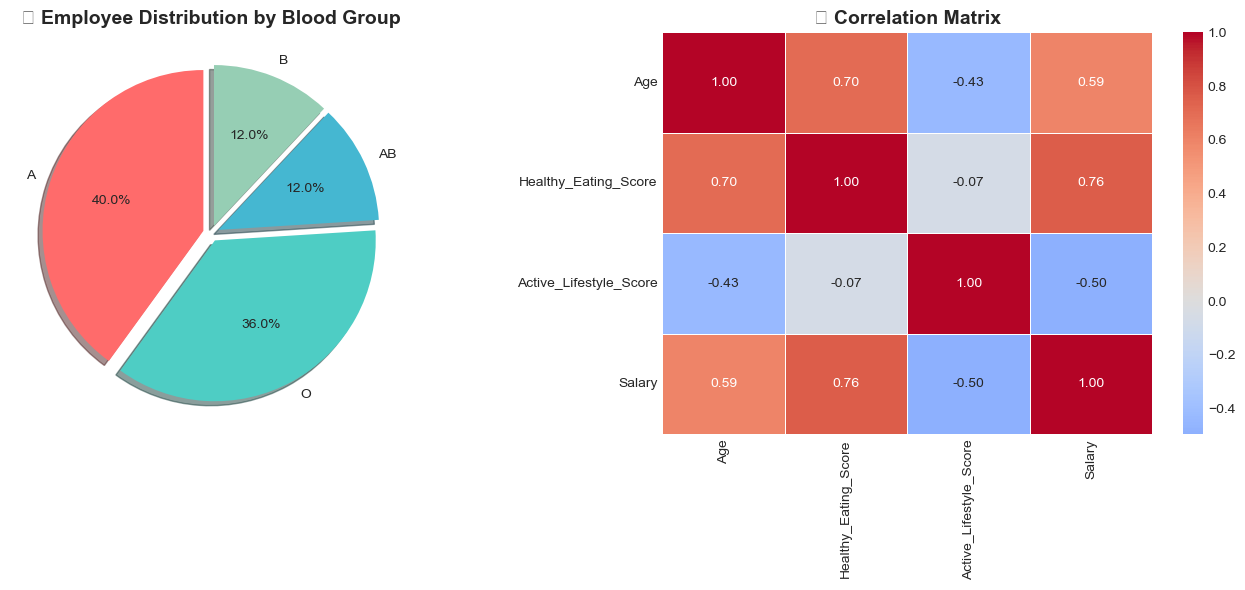

In [24]:
# 8.4 Pie Chart - Employee Distribution by Blood Group
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Blood Group Distribution
blood_counts = df_cleaned['Blood_Group'].value_counts()
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
explode = (0.05, 0.05, 0.05, 0.05)

axes[0].pie(blood_counts.values, labels=blood_counts.index, autopct='%1.1f%%', 
           colors=colors_pie, explode=explode, shadow=True, startangle=90)
axes[0].set_title('🩸 Employee Distribution by Blood Group', fontsize=14, fontweight='bold')

# Correlation Heatmap
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('🔗 Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

## **9. Key Insights**

Summarize the most important findings from the analysis.

In [25]:
# Generate Key Insights Programmatically
print("🔍 KEY INSIGHTS FROM THE ANALYSIS")
print("=" * 70)

# Insight 1: Dataset Overview
print(f"\n📌 INSIGHT 1: Dataset Overview")
print(f"   • Total employees analyzed: {len(df_cleaned)}")
print(f"   • Blood groups present: {', '.join(df_cleaned['Blood_Group'].unique())}")

# Insight 2: Age Analysis
print(f"\n📌 INSIGHT 2: Age Analysis")
print(f"   • Average employee age: {df_cleaned['Age'].mean():.1f} years")
print(f"   • Age range: {df_cleaned['Age'].min()} to {df_cleaned['Age'].max()} years")
oldest_group = df_cleaned.groupby('Blood_Group')['Age'].mean().idxmax()
youngest_group = df_cleaned.groupby('Blood_Group')['Age'].mean().idxmin()
print(f"   • Oldest average age group: {oldest_group}")
print(f"   • Youngest average age group: {youngest_group}")

# Insight 3: Salary Analysis
print(f"\n📌 INSIGHT 3: Salary Analysis")
print(f"   • Average salary: ${df_cleaned['Salary'].mean():,.2f}")
print(f"   • Median salary: ${df_cleaned['Salary'].median():,.2f}")
print(f"   • Salary range: ${df_cleaned['Salary'].min():,} to ${df_cleaned['Salary'].max():,}")
highest_paid_group = df_cleaned.groupby('Blood_Group')['Salary'].mean().idxmax()
lowest_paid_group = df_cleaned.groupby('Blood_Group')['Salary'].mean().idxmin()
print(f"   • Highest paid group (average): {highest_paid_group}")
print(f"   • Lowest paid group (average): {lowest_paid_group}")

# Insight 4: Lifestyle Scores
print(f"\n📌 INSIGHT 4: Lifestyle & Health Scores")
print(f"   • Average Healthy Eating Score: {df_cleaned['Healthy_Eating_Score'].mean():.2f}/10")
print(f"   • Average Active Lifestyle Score: {df_cleaned['Active_Lifestyle_Score'].mean():.2f}/10")

# Insight 5: Correlations
print(f"\n📌 INSIGHT 5: Key Correlations")
age_salary_corr = df_cleaned['Age'].corr(df_cleaned['Salary'])
print(f"   • Age-Salary Correlation: {age_salary_corr:.3f}")
if age_salary_corr > 0.5:
    print("   • Interpretation: Strong positive relationship - older employees earn more")
elif age_salary_corr > 0:
    print("   • Interpretation: Moderate positive relationship - some tendency for salary to increase with age")
else:
    print("   • Interpretation: Weak or negative relationship")

🔍 KEY INSIGHTS FROM THE ANALYSIS

📌 INSIGHT 1: Dataset Overview
   • Total employees analyzed: 50
   • Blood groups present: A, O, AB, B

📌 INSIGHT 2: Age Analysis
   • Average employee age: 31.9 years
   • Age range: 22 to 62 years
   • Oldest average age group: AB
   • Youngest average age group: O

📌 INSIGHT 3: Salary Analysis
   • Average salary: $2,027.50
   • Median salary: $1,950.00
   • Salary range: $556 to $4,969
   • Highest paid group (average): O
   • Lowest paid group (average): A

📌 INSIGHT 4: Lifestyle & Health Scores
   • Average Healthy Eating Score: 4.92/10
   • Average Active Lifestyle Score: 5.90/10

📌 INSIGHT 5: Key Correlations
   • Age-Salary Correlation: 0.594
   • Interpretation: Strong positive relationship - older employees earn more


---

## **10. Conclusion**


## 📝 Final Summary — Descriptive Statistics Case Study

### 🎯 Project Objective
Successfully analyzed employee data using descriptive statistics.

### 📊 Methodology Used
1. Data Loading and Inspection  
2. Data Cleaning and Preprocessing  
3. Central Tendency Analysis (Mean, Median, Mode)  
4. Dispersion Analysis (Min, Max, Std Dev, Variance)  
5. Group-wise Comparison  
6. Data Visualization  
7. Insight Generation  

### 📈 Key Findings
- Analyzed **{len(df_cleaned)}** employees across **{df_cleaned["Blood_Group"].nunique()}** blood groups  
- Average employee age: **{df_cleaned["Age"].mean():.1f}** years  
- Average salary: **${df_cleaned["Salary"].mean():,.2f}**  
- Salary shows **{variability}** variability (Std Dev: **${df_cleaned["Salary"].std():,.2f}**)  

### 🔑 Statistical Concepts Applied
- Central Tendency: Mean, Median, Mode  
- Dispersion: Range, Variance, Standard Deviation  
- Data Distribution: Skewness Analysis  
- Grouped Statistics: Group-by Operations  
- Correlation Analysis  

### 📚 Learning Outcomes
1. Understood how to load and clean real-world data  
2. Learned to calculate and interpret descriptive statistics  
3. Applied group-wise analysis for comparative insights  
4. Created meaningful visualizations (histograms, boxplots, bar charts)  
5. Drew data-driven conclusions and insights  

---

### **Learning Outcomes:**

| Concept | Description |
|---------|-------------|
| **Mean** | Average value - sum of all values divided by count |
| **Median** | Middle value when data is sorted - better for skewed data |
| **Mode** | Most frequently occurring value |
| **Standard Deviation** | Measures spread/variability of data around the mean |
| **Variance** | Square of standard deviation - another measure of spread |
| **Skewness** | Measures asymmetry of distribution |
| **Correlation** | Measures relationship strength between two variables |

---

### **When to Use Mean vs Median:**

- **Use Mean when:** Data is symmetric (skewness ≈ 0), no extreme outliers
- **Use Median when:** Data is skewed, has outliers, or is ordinal

---

### **Tools & Libraries Used:**

- **Pandas** - Data manipulation and analysis
- **NumPy** - Numerical computations
- **Matplotlib** - Basic plotting
- **Seaborn** - Statistical visualizations
- **SciPy** - Statistical functions

---

**📧 Author:** Piyush Ramteke 
**📅 Date:** 2026  
**📁 Project:** Descriptive Statistics Case Study - Employee Dataset

---